In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import scipy.io
x = scipy.io.loadmat('distrib.mat')

In [3]:
normal = pd.DataFrame(x.get('normal')).to_numpy()
laplacian = pd.DataFrame(x.get('laplacian')).to_numpy()
uniform = pd.DataFrame(x.get('uniform')).to_numpy()

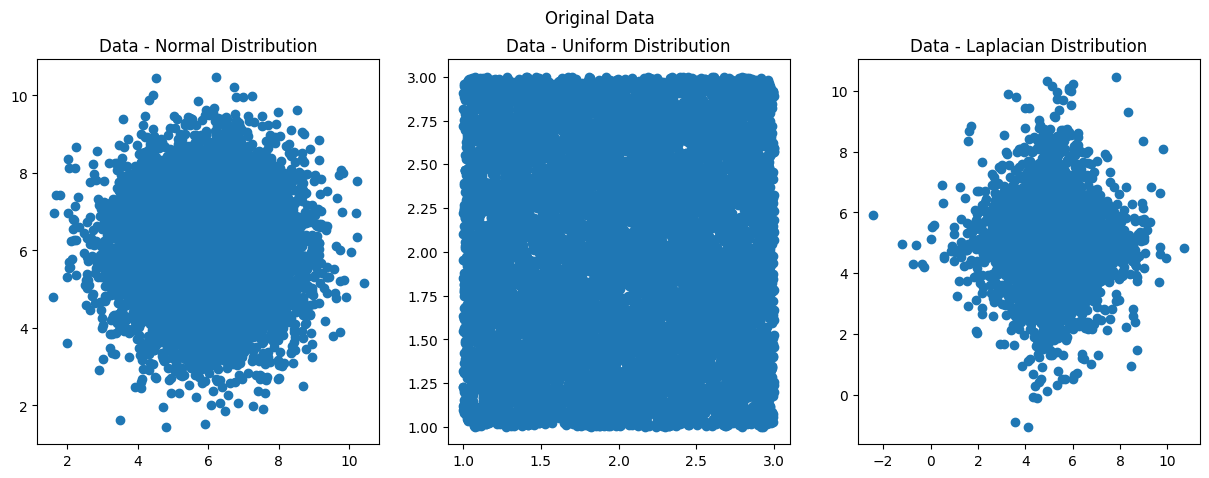

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].scatter(normal[0], normal[1])
ax[0].set_title('Data - Normal Distribution')
ax[1].scatter(uniform[0], uniform[1])
ax[1].set_title('Data - Uniform Distribution')
ax[2].scatter(laplacian[0], laplacian[1])
ax[2].set_title('Data - Laplacian Distribution')
fig.suptitle('Original Data')
plt.show()

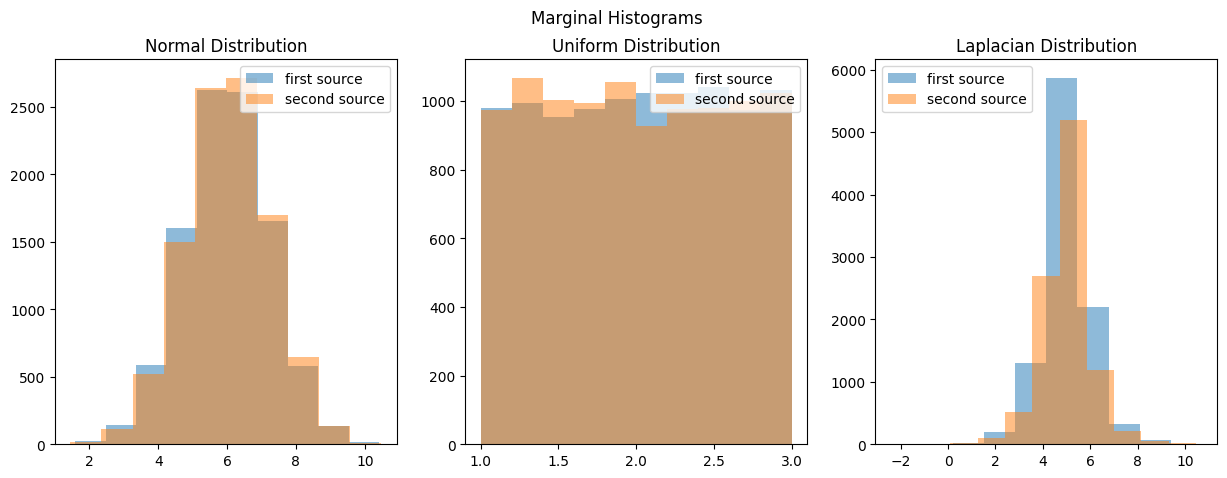

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(normal[0], alpha = 0.5, label = 'first source')
ax[0].hist(normal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(uniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(uniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(laplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(laplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [6]:
A = [[4,3], [2,1]]

x_normal = np.dot(A,normal)
x_laplacian = np.dot(A,laplacian)
x_uniform = np.dot(A,uniform)

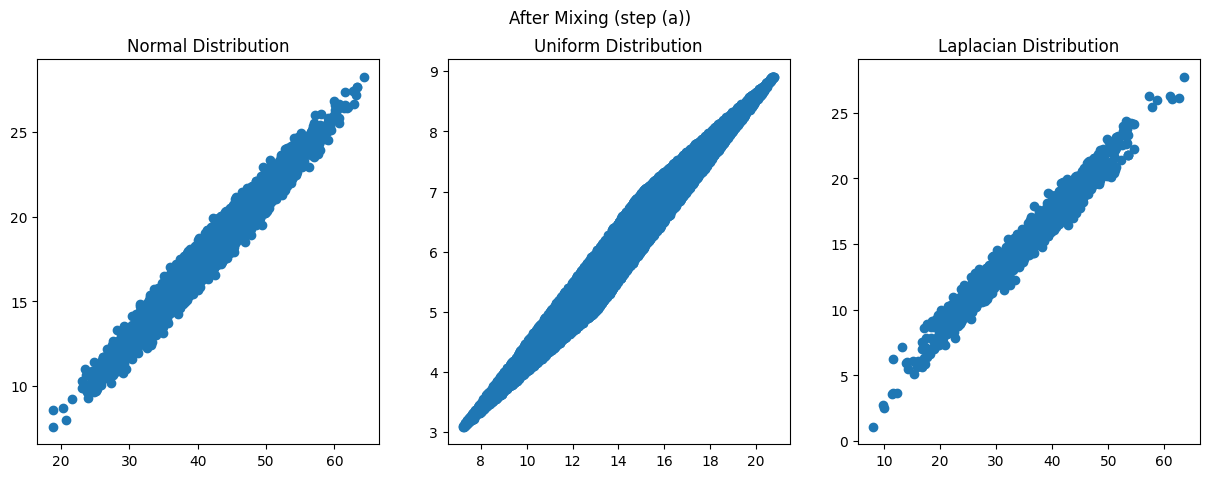

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].scatter(x_normal[0], x_normal[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(x_uniform[0], x_uniform[1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(x_laplacian[0], x_laplacian[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('After Mixing (step (a))')
plt.show()

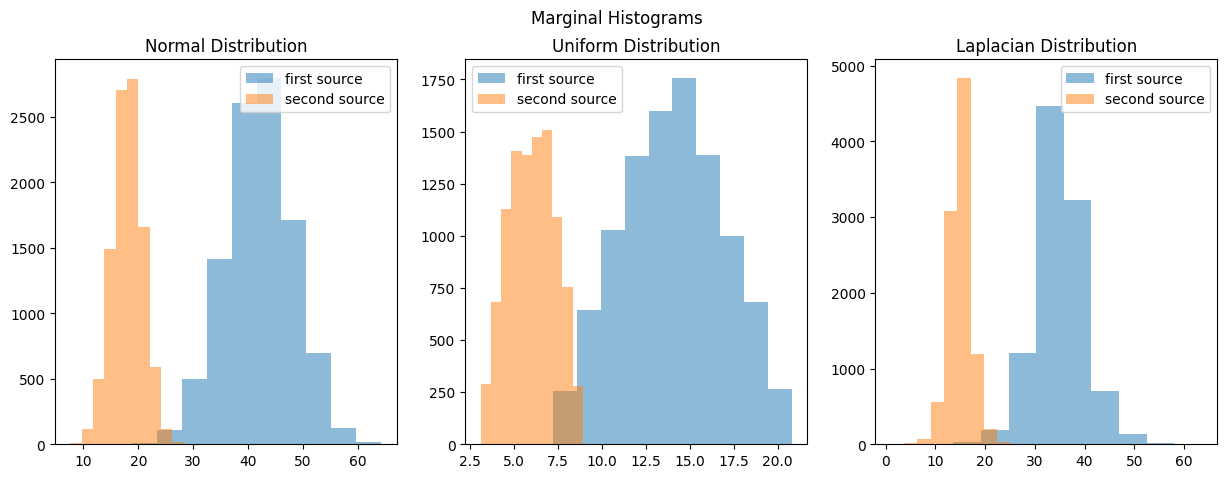

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(x_normal[0], alpha = 0.5, label = 'first source')
ax[0].hist(x_normal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(x_uniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(x_uniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(x_laplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(x_laplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [9]:
# center to zero mean
def center_data(data):
  data = data  - np.mean(data, axis=1, keepdims=True)
  return data

x_normal0 = center_data(x_normal)
x_uniform0 = center_data(x_uniform)
x_laplacian0 = center_data(x_laplacian)

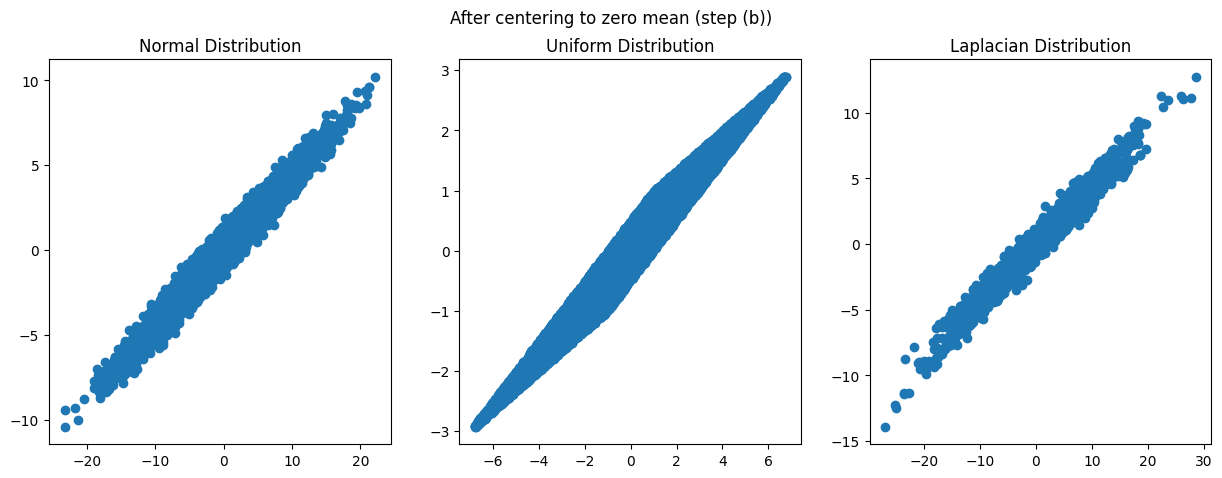

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].scatter(x_normal0[0], x_normal0[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(x_uniform0[0], x_uniform0[1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(x_laplacian0[0], x_laplacian0[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('After centering to zero mean (step (b))')
plt.show()

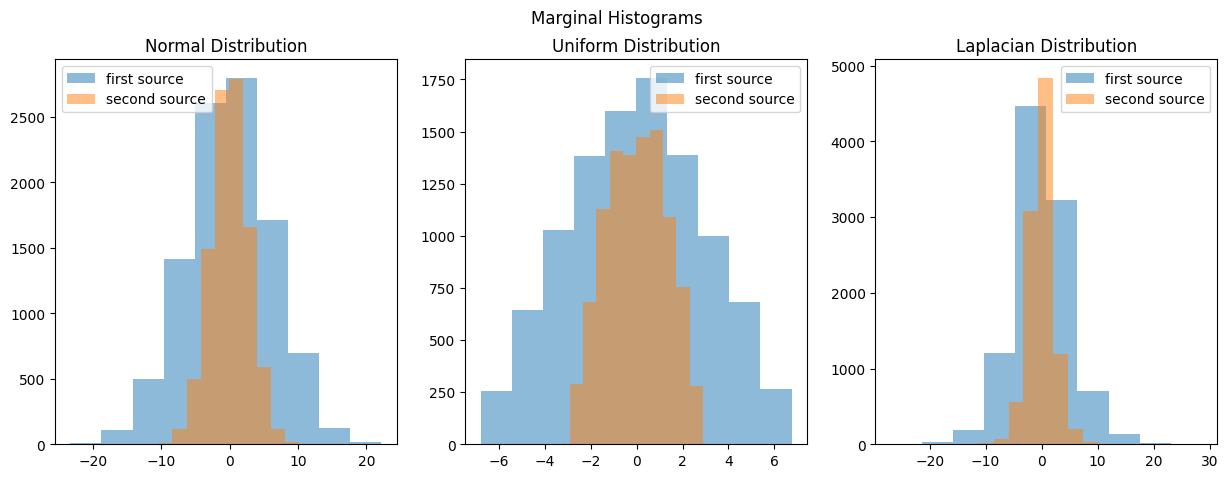

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(x_normal0[0], alpha = 0.5, label = 'first source')
ax[0].hist(x_normal0[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(x_uniform0[0], alpha = 0.5, label = 'first source')
ax[1].hist(x_uniform0[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(x_laplacian0[0], alpha = 0.5, label = 'first source')
ax[2].hist(x_laplacian0[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [12]:
def decorrelate(data):
  C = np.cov(data)
  eigenvalues, eigenvectors = np.linalg.eigh(C)
  x_decorrelated = np.dot(eigenvectors.T,data)
  return x_decorrelated

pcnormal = decorrelate(x_normal0)
pcuniform = decorrelate(x_uniform0)
pclaplacian = decorrelate(x_laplacian0)

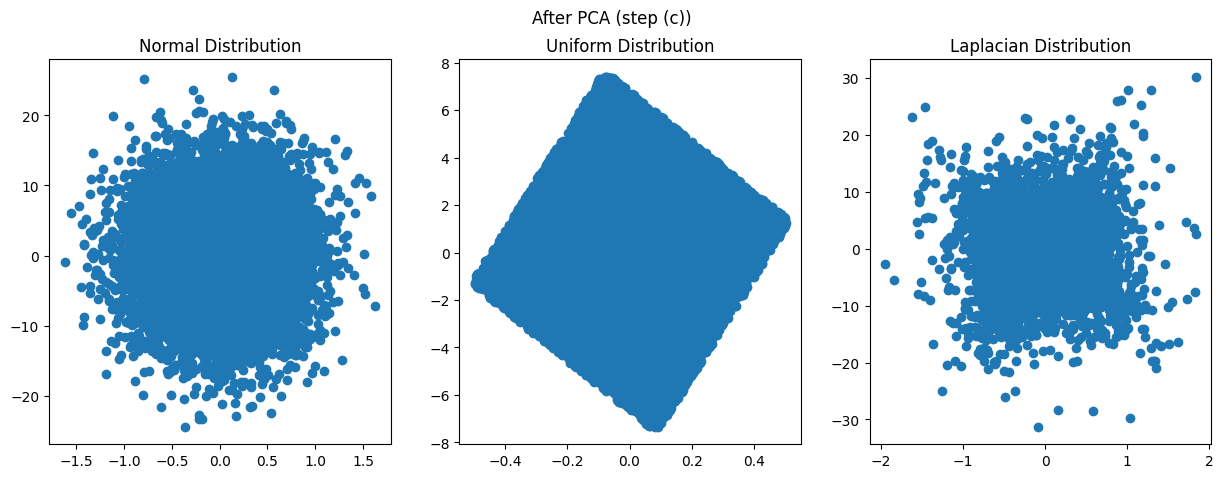

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax[0].scatter(pcnormal[0], pcnormal[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(pcuniform[0], pcuniform[1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(pclaplacian[0], pclaplacian[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('After PCA (step (c))')
plt.show()

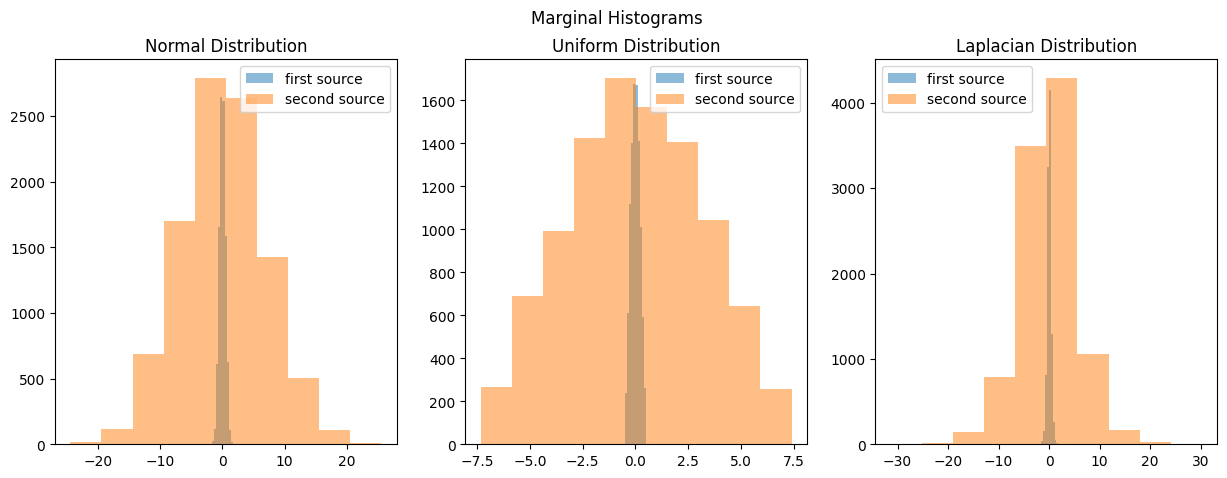

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(pcnormal[0], alpha = 0.5, label = 'first source')
ax[0].hist(pcnormal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(pcuniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(pcuniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(pclaplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(pclaplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [15]:
def unit_var(data):
  C = np.cov(data)
  eigenvalues, eigenvectors = np.linalg.eigh(C)
  x_decorrelated = np.dot(eigenvectors.T,data)
  x_whitened = np.array([x_decorrelated[0]/np.sqrt(eigenvalues[0]),x_decorrelated[1]/np.sqrt(eigenvalues[1])])
  return x_whitened

pcuniform_unit = unit_var(x_uniform0)
pcnormal_unit = unit_var(x_normal0)
pclaplacian_unit = unit_var(x_laplacian0)

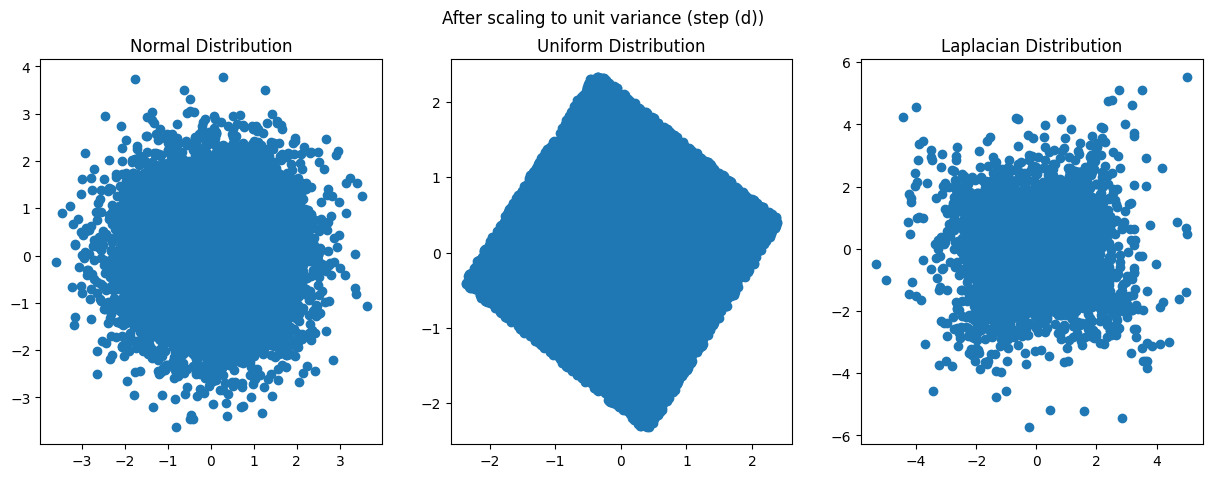

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax[0].scatter(pcnormal_unit[0], pcnormal_unit[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(pcuniform_unit[0], pcuniform_unit[1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(pclaplacian_unit[0], pclaplacian_unit[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('After scaling to unit variance (step (d))')
plt.show()

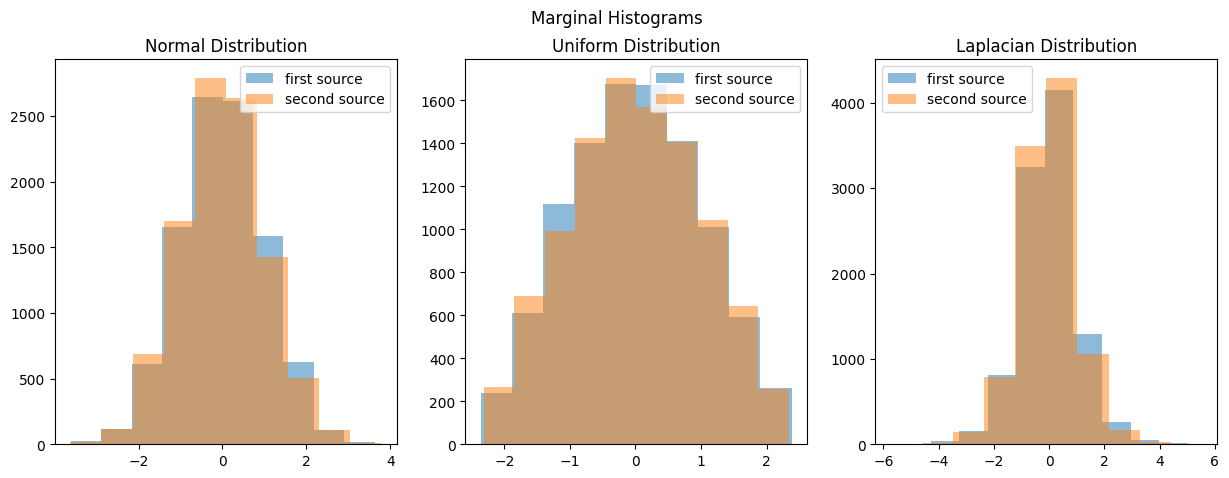

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(pcnormal_unit[0], alpha = 0.5, label = 'first source')
ax[0].hist(pcnormal_unit[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(pcuniform_unit[0], alpha = 0.5, label = 'first source')
ax[1].hist(pcuniform_unit[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(pclaplacian_unit[0], alpha = 0.5, label = 'first source')
ax[2].hist(pclaplacian_unit[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [18]:
def rotation_matrix(theta):
  R = [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
  return R

def apply_rotation(data, theta):
  matrix = rotation_matrix(theta)
  x_theta = np.dot(matrix, data)
  return x_theta

In [19]:
def kurt(x):
  kurt = np.mean(np.power(x,4), axis = 1, keepdims = True)-3
  return kurt

In [20]:
def find_angles(data):
  theta = np.arange(0, 2*np.pi, np.pi/50)

  max = -1000
  min = 1000
  minangle = 0
  kurtosis_values = []

  for i in theta:
    rotated = apply_rotation(np.array(data), i)
    kurtosis = kurt(rotated)
    kurtosis_values.append(kurtosis.tolist())
    if kurtosis[0] > max:
      max = kurtosis[0]
      maxangle = i
    elif kurtosis[0] < min:
      min = kurtosis[0]
      minangle = i
      
  return max, min, maxangle, minangle, kurtosis_values


In [21]:
angles_normal = find_angles(pcnormal_unit)
angles_uniform = find_angles(pcuniform_unit)
angles_laplacian = find_angles(pclaplacian_unit)

In [22]:
print('Normal Distribution')
print('max kurtosis ', angles_normal[0][0])
print('min kurtosis ', angles_normal[1][0])
print('max angle ', angles_normal[2])
print('min angle ', angles_normal[3])

Normal Distribution
max kurtosis  0.0013696690944171586
min kurtosis  -0.0729009252986983
max angle  5.46637121724624
min angle  0.12566370614359174


In [23]:
print('Uniform Distribution')
print('max kurtosis ', angles_uniform[0][0])
print('min kurtosis ', angles_uniform[1][0])
print('max angle ', angles_uniform[2])
print('min angle ', angles_uniform[3])

Uniform Distribution
max kurtosis  -0.581252500548223
min kurtosis  -1.2165617060535656
max angle  6.094689747964199
min angle  3.769911184307752


In [24]:
print('laplacian Distribution')
print('max kurtosis ', angles_laplacian[0][0])
print('min kurtosis ', angles_laplacian[1][0])
print('max angle ', angles_laplacian[2])
print('min angle ', angles_laplacian[3])

laplacian Distribution
max kurtosis  3.0186505751017876
min kurtosis  1.5841031942810027
max angle  5.340707511102649
min angle  6.157521601035995


In [25]:
max_kurt_rot_normal = apply_rotation(pcnormal_unit, angles_normal[2])
max_kurt_rot_uniform = apply_rotation(pcuniform_unit, angles_uniform[2])
max_kurt_rot_laplacian = apply_rotation(pclaplacian_unit, angles_laplacian[2])

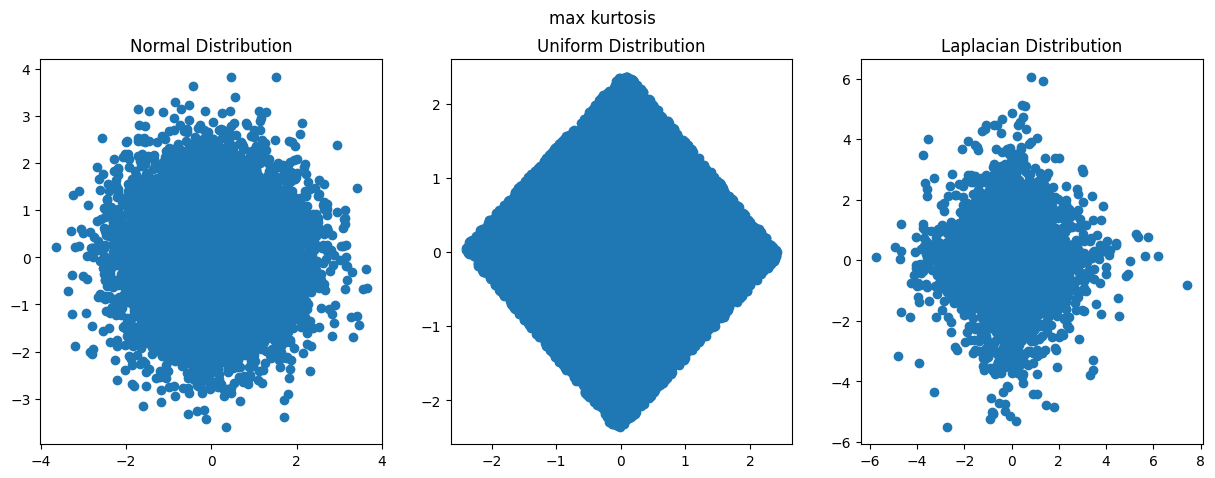

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax[0].scatter(max_kurt_rot_normal[0], max_kurt_rot_normal[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(max_kurt_rot_uniform [0], max_kurt_rot_uniform [1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(max_kurt_rot_laplacian[0], max_kurt_rot_laplacian[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('max kurtosis')
plt.show()

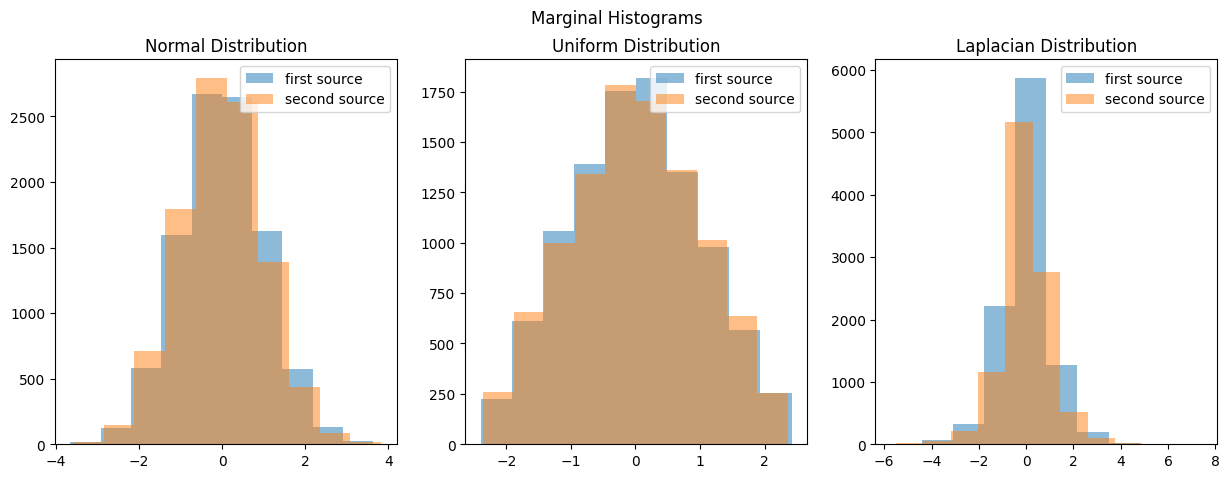

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(max_kurt_rot_normal[0], alpha = 0.5, label = 'first source')
ax[0].hist(max_kurt_rot_normal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(max_kurt_rot_uniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(max_kurt_rot_uniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(max_kurt_rot_laplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(max_kurt_rot_laplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

In [28]:
min_kurt_rot_normal = apply_rotation(pcnormal_unit, angles_normal[3])
min_kurt_rot_uniform = apply_rotation(pcuniform_unit, angles_uniform[3])
min_kurt_rot_laplacian = apply_rotation(pclaplacian_unit, angles_laplacian[3])

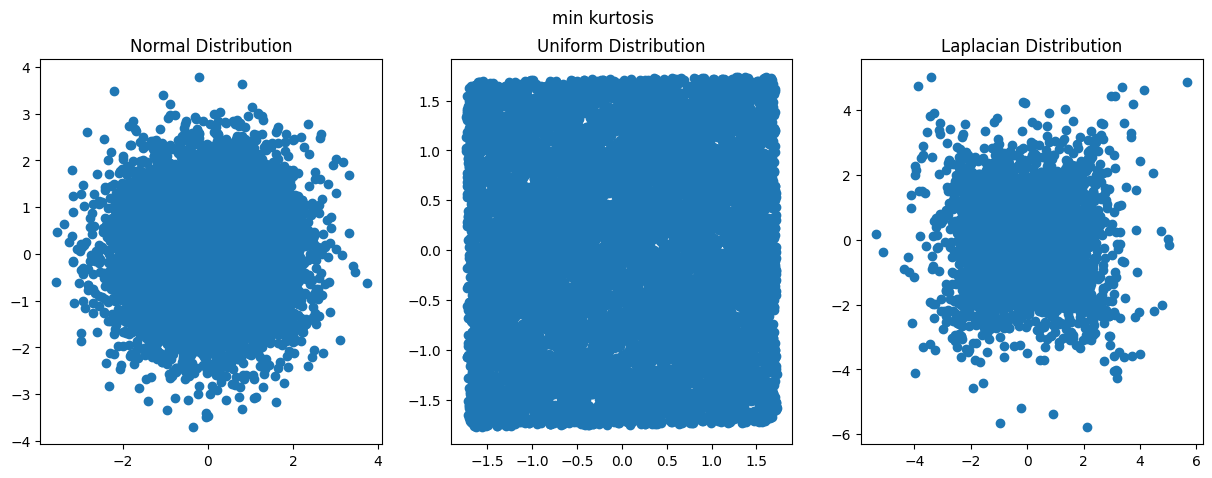

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax[0].scatter(min_kurt_rot_normal[0], min_kurt_rot_normal[1])
ax[0].set_title('Normal Distribution')
ax[1].scatter(min_kurt_rot_uniform [0], min_kurt_rot_uniform [1])
ax[1].set_title('Uniform Distribution')
ax[2].scatter(min_kurt_rot_laplacian[0], min_kurt_rot_laplacian[1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('min kurtosis')
plt.show()

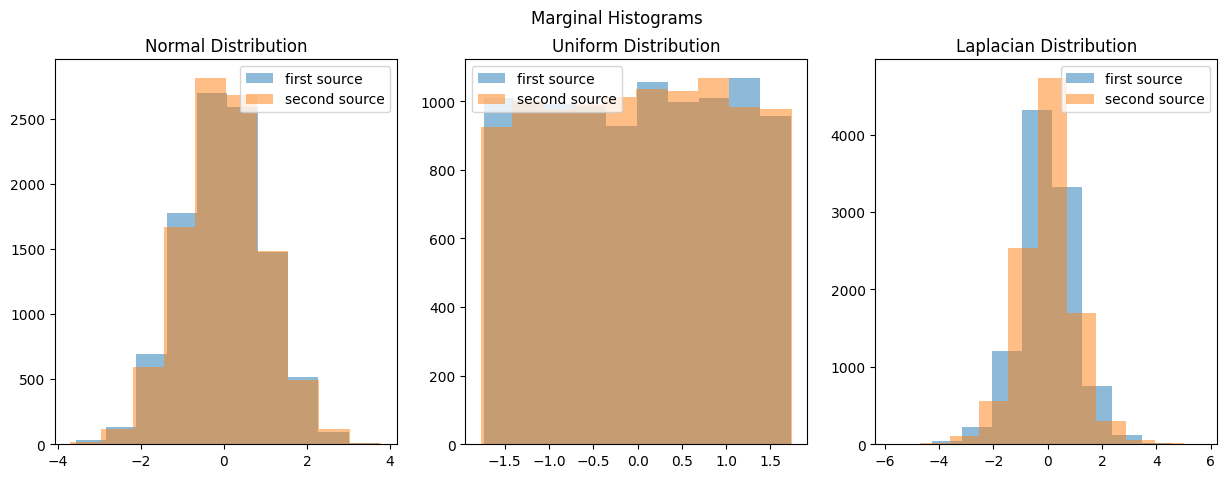

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(min_kurt_rot_normal[0], alpha = 0.5, label = 'first source')
ax[0].hist(min_kurt_rot_normal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Normal Distribution')
ax[1].hist(min_kurt_rot_uniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(min_kurt_rot_uniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('Uniform Distribution')
ax[2].hist(min_kurt_rot_laplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(min_kurt_rot_laplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('Laplacian Distribution')
fig.suptitle('Marginal Histograms')
plt.show()

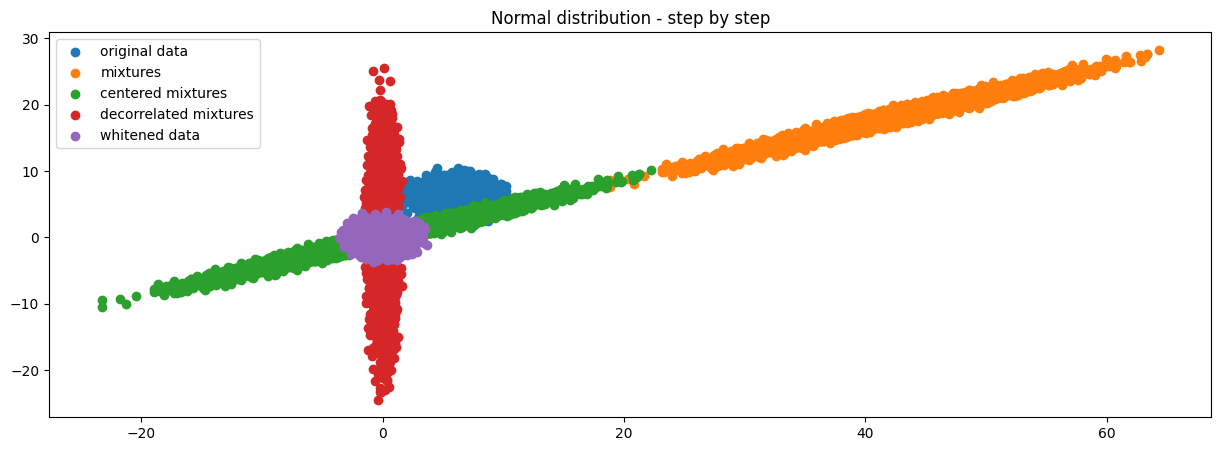

In [31]:
plt.figure(figsize=(15,5))
plt.scatter(normal[0], normal[1], label = 'original data')
plt.scatter(x_normal[0], x_normal[1], label = 'mixtures')
plt.scatter(x_normal0[0], x_normal0[1], label = 'centered mixtures')
plt.scatter(pcnormal[0], pcnormal[1], label = 'decorrelated mixtures')
plt.scatter(pcnormal_unit[0], pcnormal_unit[1], label = 'whitened data')
plt.legend()
plt.title('Normal distribution - step by step')
plt.show()

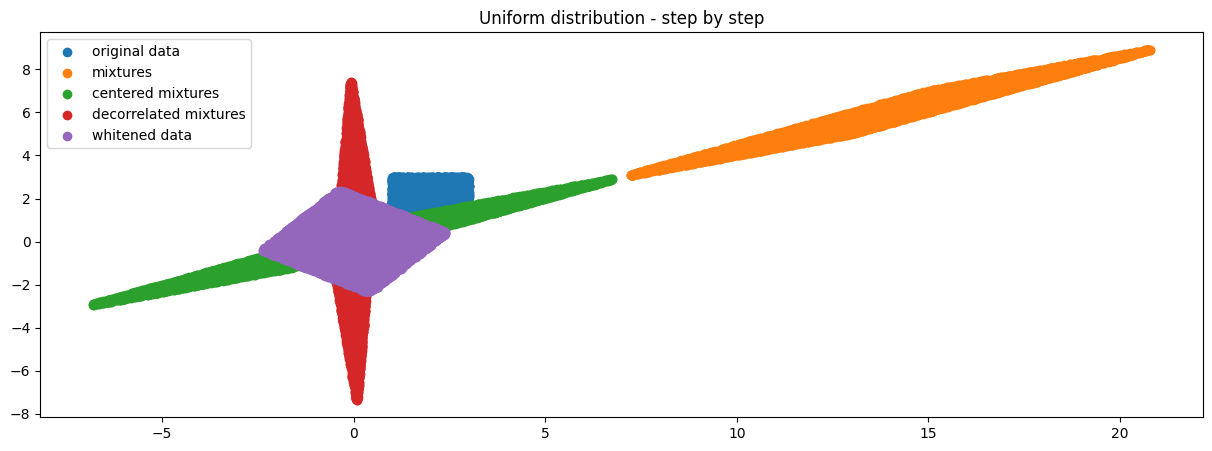

In [32]:
plt.figure(figsize=(15,5))
plt.scatter(uniform[0], uniform[1], label = 'original data')
plt.scatter(x_uniform[0], x_uniform[1], label = 'mixtures')
plt.scatter(x_uniform0[0], x_uniform0[1], label = 'centered mixtures')
plt.scatter(pcuniform[0], pcuniform[1], label = 'decorrelated mixtures')
plt.scatter(pcuniform_unit[0], pcuniform_unit[1], label = 'whitened data')
plt.legend()
plt.title('Uniform distribution - step by step')
plt.show()

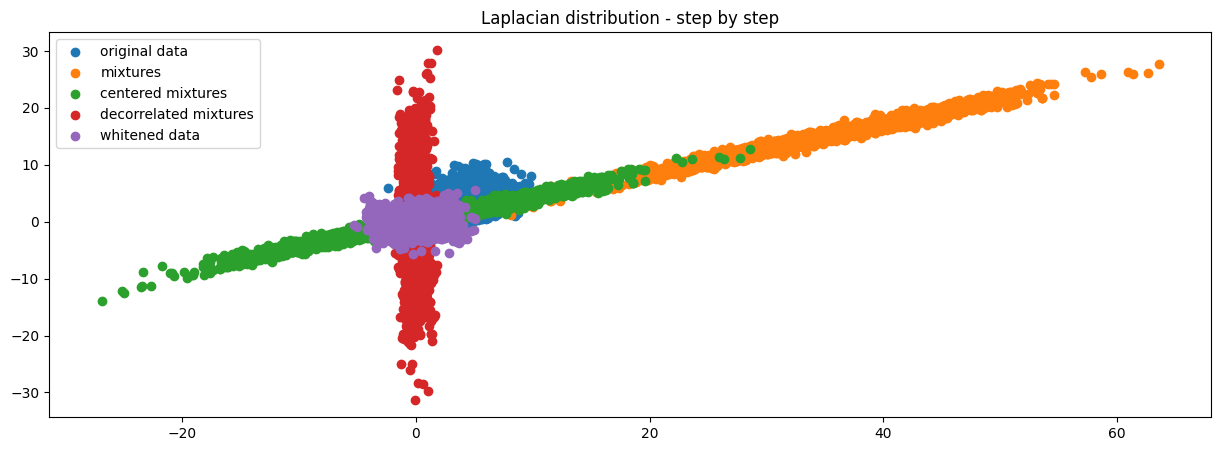

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(laplacian[0], laplacian[1], label = 'original data')
plt.scatter(x_laplacian[0], x_laplacian[1], label = 'mixtures')
plt.scatter(x_laplacian0[0], x_laplacian0[1], label = 'centered mixtures')
plt.scatter(pclaplacian[0], pclaplacian[1], label = 'decorrelated mixtures')
plt.scatter(pclaplacian_unit[0], pclaplacian_unit[1], label = 'whitened data')
plt.legend()
plt.title('Laplacian distribution - step by step')
plt.show()

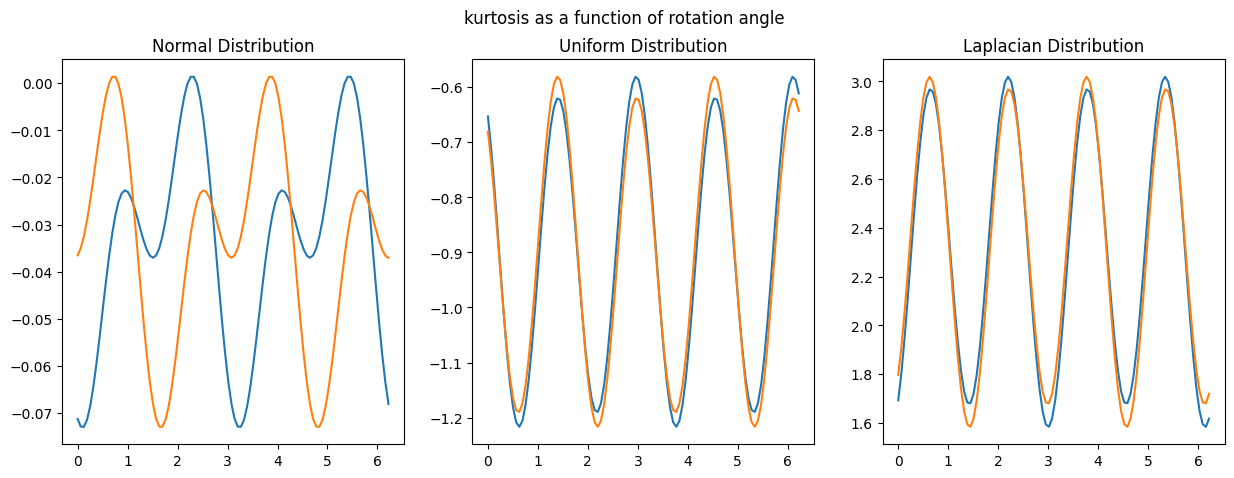

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5))
ax[0].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_normal[4]).T[0][0])
ax[0].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_normal[4]).T[0][1])
ax[0].set_title('Normal Distribution')
ax[1].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_uniform[4]).T[0][0])
ax[1].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_uniform[4]).T[0][1])
ax[1].set_title('Uniform Distribution')
ax[2].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_laplacian[4]).T[0][0])
ax[2].plot(np.arange(0, 2*np.pi, np.pi/50), np.array(angles_laplacian[4]).T[0][1])
ax[2].set_title('Laplacian Distribution')
fig.suptitle('kurtosis as a function of rotation angle')
plt.show()

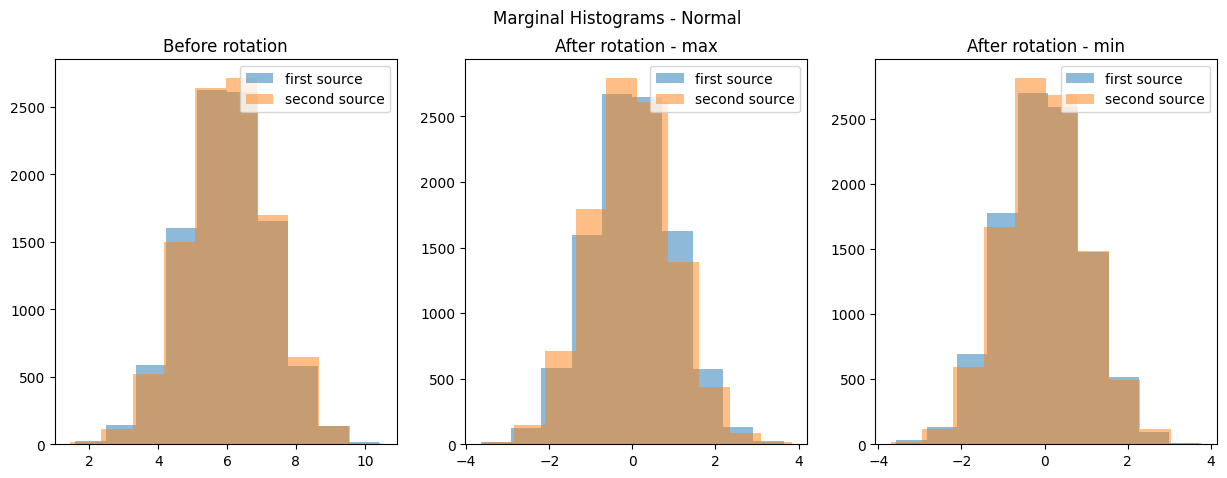

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(normal[0], alpha = 0.5, label = 'first source')
ax[0].hist(normal[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Before rotation')
ax[1].hist(max_kurt_rot_normal[0], alpha = 0.5, label = 'first source')
ax[1].hist(max_kurt_rot_normal[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('After rotation - max')
ax[2].hist(min_kurt_rot_normal[0], alpha = 0.5, label = 'first source')
ax[2].hist(min_kurt_rot_normal[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('After rotation - min')
fig.suptitle('Marginal Histograms - Normal')
plt.show()

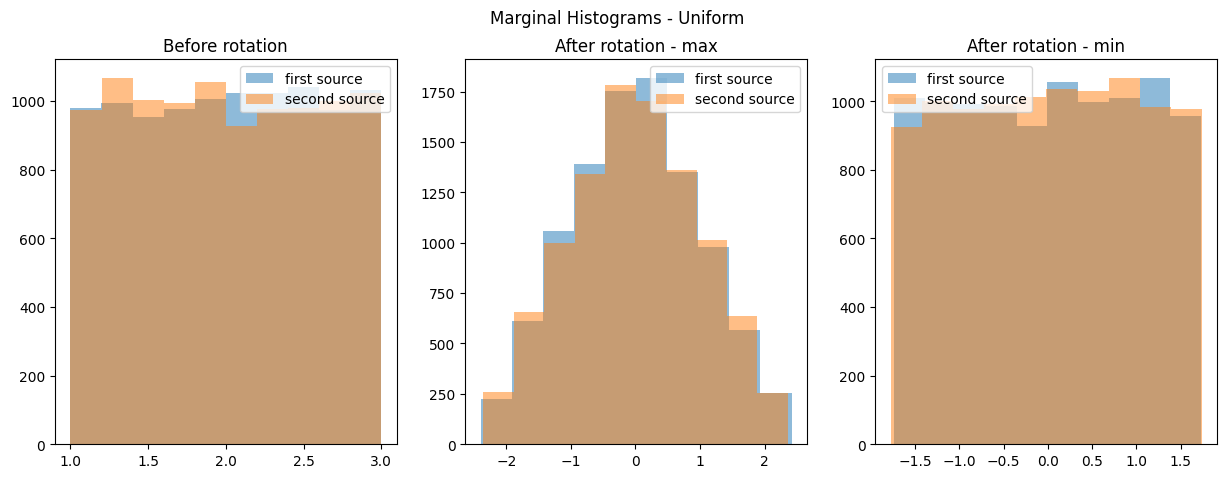

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(uniform[0], alpha = 0.5, label = 'first source')
ax[0].hist(uniform[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Before rotation')
ax[1].hist(max_kurt_rot_uniform[0], alpha = 0.5, label = 'first source')
ax[1].hist(max_kurt_rot_uniform[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('After rotation - max')
ax[2].hist(min_kurt_rot_uniform[0], alpha = 0.5, label = 'first source')
ax[2].hist(min_kurt_rot_uniform[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('After rotation - min')
fig.suptitle('Marginal Histograms - Uniform')
plt.show()

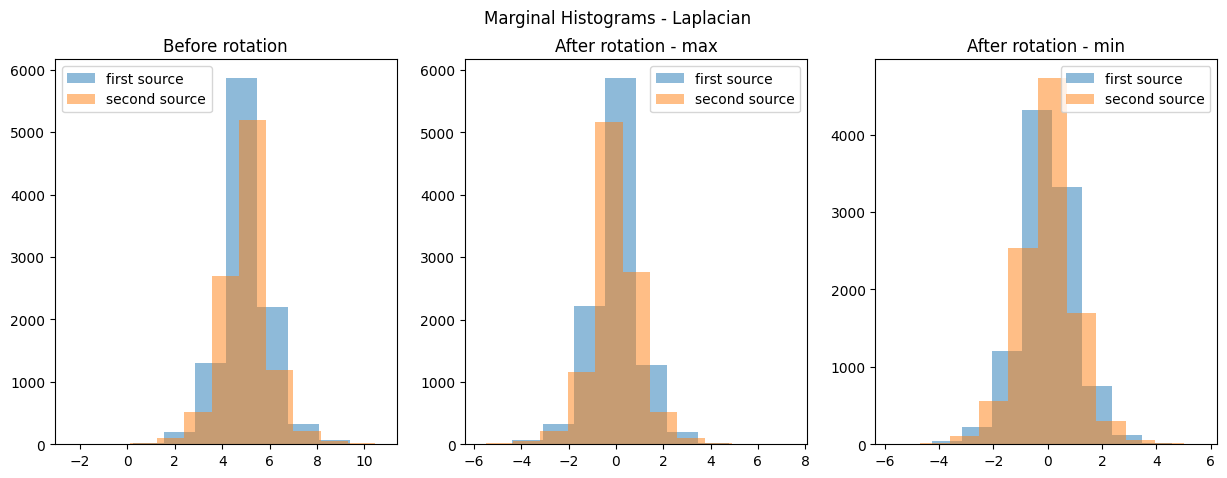

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax[0].hist(laplacian[0], alpha = 0.5, label = 'first source')
ax[0].hist(laplacian[1], alpha = 0.5, label = 'second source')
ax[0].legend()
ax[0].set_title('Before rotation')
ax[1].hist(max_kurt_rot_laplacian[0], alpha = 0.5, label = 'first source')
ax[1].hist(max_kurt_rot_laplacian[1], alpha = 0.5, label = 'second source')
ax[1].legend()
ax[1].set_title('After rotation - max')
ax[2].hist(min_kurt_rot_laplacian[0], alpha = 0.5, label = 'first source')
ax[2].hist(min_kurt_rot_laplacian[1], alpha = 0.5, label = 'second source')
ax[2].legend()
ax[2].set_title('After rotation - min')
fig.suptitle('Marginal Histograms - Laplacian')
plt.show()

As you can see above, we observe the largest change in the marginal distributions after rotationg the uniform distribution by θ_max. In all cases the scale of the x-axis changed. 


One method for solving the ICA problem is to maximize the nongaussianity of our sources. One way of doing this is using kurtosis-based ICA. In ICA we don't want both of our sources to be gaussian (only one is allowed to be gaussian) because mixing two independent Gaussians leads to a joint mixed distribution that is equal to that of the original sources. 

Kurtosis can be seen as a measure of nongaussianity (if the absolute value of the kurtosis is larger than 0 it is nongaussian, meaning it has even longer or shorter tails than a gaussian).